# DS5230 Project: Potential Loan Default Detection

**Author**: Naiyi Zhang, Yongzheng Li

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings(action="ignore")

# Load Dataset & Visualization

In [3]:
## Read only necessary columns of the original dataset into dataframe
column_names = ["TARGET", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
df = pd.read_csv("application_data.csv", usecols=column_names)

## Drop rows with missing values (can use other approach)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
## Print the first several rows of the dataframe
df.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,...,Laborers,1.0,2,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,...,Core staff,2.0,1,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,...,Laborers,1.0,2,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,...,Core staff,1.0,2,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,...,Laborers,2.0,2,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
## Print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182811 entries, 0 to 182810
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      182811 non-null  int64  
 1   NAME_CONTRACT_TYPE          182811 non-null  object 
 2   FLAG_OWN_CAR                182811 non-null  object 
 3   FLAG_OWN_REALTY             182811 non-null  object 
 4   CNT_CHILDREN                182811 non-null  int64  
 5   AMT_INCOME_TOTAL            182811 non-null  float64
 6   AMT_CREDIT                  182811 non-null  float64
 7   AMT_ANNUITY                 182811 non-null  float64
 8   NAME_INCOME_TYPE            182811 non-null  object 
 9   NAME_EDUCATION_TYPE         182811 non-null  object 
 10  NAME_FAMILY_STATUS          182811 non-null  object 
 11  NAME_HOUSING_TYPE           182811 non-null  object 
 12  DAYS_BIRTH                  182811 non-null  int64  
 13  DAYS_EMPLOYED 

# rows: 182811
# rows with TARGET == 1: 15353
# rows with TARGET == 0: 167458


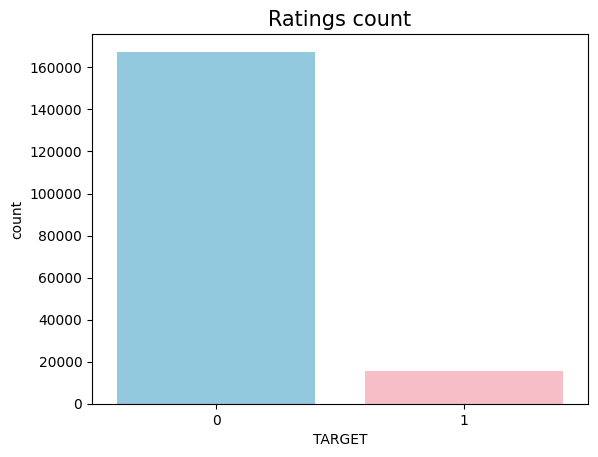

In [6]:
## Visualize positive and negative rows
print("# rows:", df.shape[0])
print("# rows with TARGET == 1:", df[df["TARGET"] == 1].shape[0])
print("# rows with TARGET == 0:", df[df["TARGET"] == 0].shape[0])

sns.countplot(x=df["TARGET"], palette=["skyblue", "lightpink"])
plt.title("Ratings count", fontsize = 15)
plt.show()

# Data Preprocessing

In [7]:
## Convert texts to numbers
std_df = df.copy()

for column_name in column_names:
    values = std_df[column_name].unique()
    if not np.issubdtype(values.dtype, np.number):
        mapping = {}
        index = 0
        for value in values:
            mapping[value] = index
            index += 1
        std_df[column_name] = std_df[column_name].replace(mapping)

In [8]:
## Standardize numerical data
std_df = std_df.drop("TARGET", axis=1)
X = std_df.values
scaler = StandardScaler()
std_df = scaler.fit_transform(X)
std_df = pd.DataFrame(std_df, columns=column_names[1:])

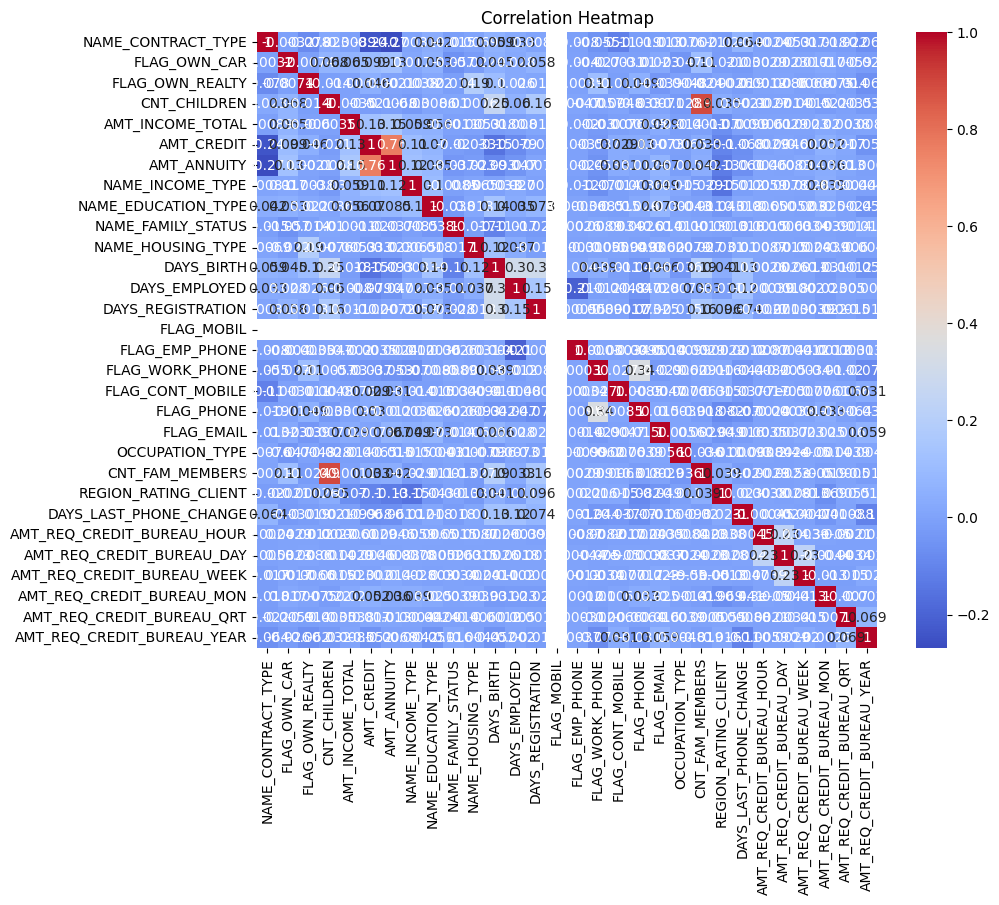

In [9]:
## Plot a correlation heatmap with values
plt.figure(figsize=(10, 8))
sns.heatmap(std_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
## Custom class to perform Principal Component Analysis (PCA)
class Custom_PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit_transform(self, X):
        self.mean = np.mean(X, axis=0)
        centered_data = X - self.mean
        covariance_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]
        self.components = eigenvectors[:, :self.n_components]
        projected_data = np.dot(centered_data, self.components)

        return projected_data

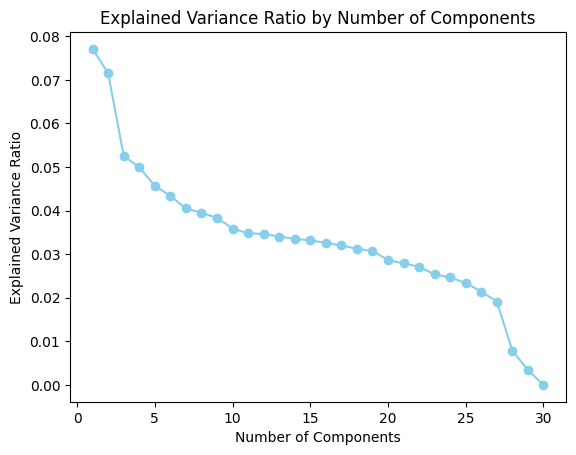

In [11]:
## Visualization of the explained variance ratio to decide on the number of components
pca = PCA()
pca.fit(std_df)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker="o", c="skyblue")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Number of Components")
plt.show()

In [12]:
## Perform dimensionality reduction using PCA
n_components = 5
pca_custom = Custom_PCA(n_components=n_components)
X_pca = pca_custom.fit_transform(std_df)
print(X_pca.shape)

(182811, 5)


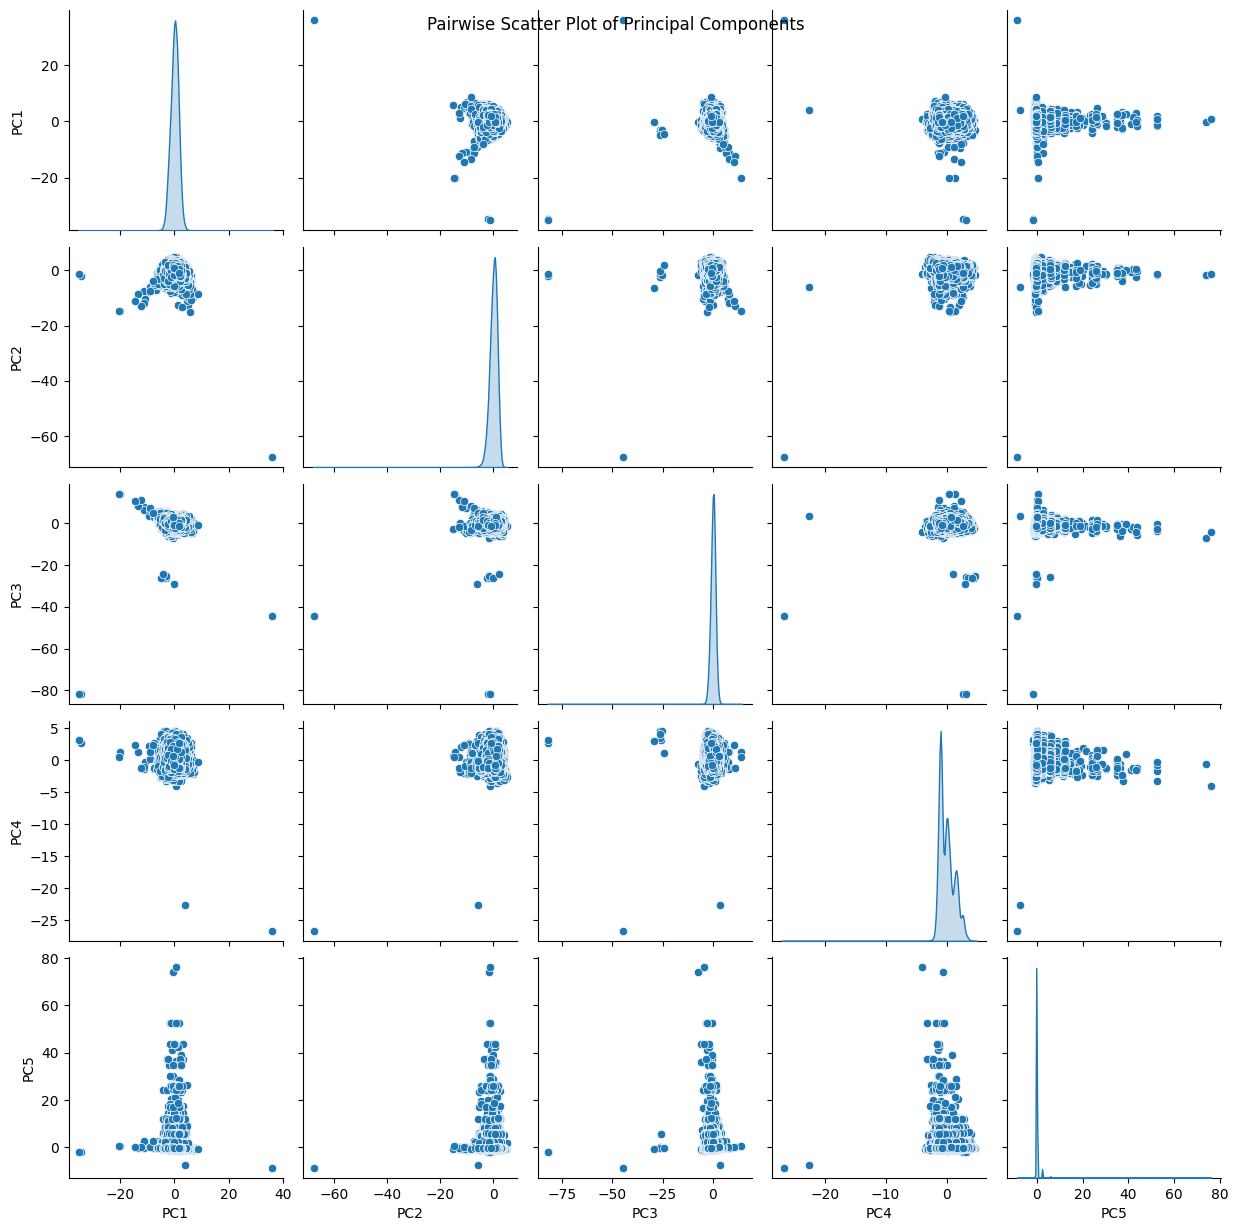

In [13]:
## Code to visualize with Paiwise Scatter Plot of PCs
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

sns.pairplot(pca_df, diag_kind="kde")
plt.suptitle("Pairwise Scatter Plot of Principal Components")
plt.show()

# DBSCAN

In [14]:
def performance_metrics(df):
    correct = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(df)):
        if df["TARGET"][i] == 1 and df["dbscan_labels"][i] != 0:
            correct += 1
            tp += 1
        elif df["TARGET"][i] == 0 and df["dbscan_labels"][i] == 0:
            correct += 1
            tn += 1
        elif df["TARGET"][i] == 1 and df["dbscan_labels"][i] == 0:
            fp += 1
        elif df["TARGET"][i] == 0 and df["dbscan_labels"][i] != 0:
            fn += 1
    return correct, tp, tn, fp, fn

In [15]:
def f1_score(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [37]:
## Experiment across different parameters
tps = []
tns = []
accs = []
f1s = []

min_samples = 2 * X_pca.shape[1]
for eps in np.arange(0.2, 0.6, 0.1):
    dbscan=DBSCAN(eps=round(eps, 1), min_samples=min_samples).fit(X_pca)
    df_copy = df.copy()
    df_copy["dbscan_labels"] = dbscan.labels_
    num_clusters = len(df_copy["dbscan_labels"].value_counts())

    correct, tp, tn, fp, fn = performance_metrics(df_copy)
    tps.append(tp)
    tns.append(tn)

    acc = correct / df.shape[0]
    f1 = f1_score(tp, fp, fn)
    accs.append(acc)
    f1s.append(f1)

    print("eps=" + str(round(eps, 1)))
    print("# clusters generated:", num_clusters)
    print("# correctly clustered rows:", correct)
    print("# true positives: " + str(tp) + " (" + str(round(tp/len(df[df["TARGET"] == 1]), 2)) + "%)")
    print("# true negatives: " + str(tn) + " (" + str(round(tn/len(df[df["TARGET"] == 0]), 2)) + "%)")
    print("# false positives: " + str(fp) + " (" + str(round(fp/len(df[df["TARGET"] == 1]), 2)) + "%)")
    print("# false negatives: " + str(fn) + " (" + str(round(fn/len(df[df["TARGET"] == 0]), 2)) + "%)")

    print("F1 Score:", f1)
    print("Accuracy:", acc)
    print()

eps=0.2
# clusters generated: 344
# correctly clustered rows: 41597
# true positives: 12310 (0.8%)
# true negatives: 29287 (0.17%)
# false positives: 3043 (0.2%)
# false negatives: 138171 (0.83%)
F1 Score: 0.14846171472677497
Accuracy: 0.22754101230232315

eps=0.3
# clusters generated: 128
# correctly clustered rows: 123741
# true positives: 3642 (0.24%)
# true negatives: 120099 (0.72%)
# false positives: 11711 (0.76%)
# false negatives: 47359 (0.28%)
F1 Score: 0.1097748440184465
Accuracy: 0.6768794000361028

eps=0.4
# clusters generated: 47
# correctly clustered rows: 148449
# true positives: 1630 (0.11%)
# true negatives: 146819 (0.88%)
# false positives: 13723 (0.89%)
# false negatives: 20639 (0.12%)
F1 Score: 0.08665142735633405
Accuracy: 0.8120353808031245

eps=0.5
# clusters generated: 26
# correctly clustered rows: 156570
# true positives: 983 (0.06%)
# true negatives: 155587 (0.93%)
# false positives: 14370 (0.94%)
# false negatives: 11871 (0.07%)
F1 Score: 0.06969901088382316


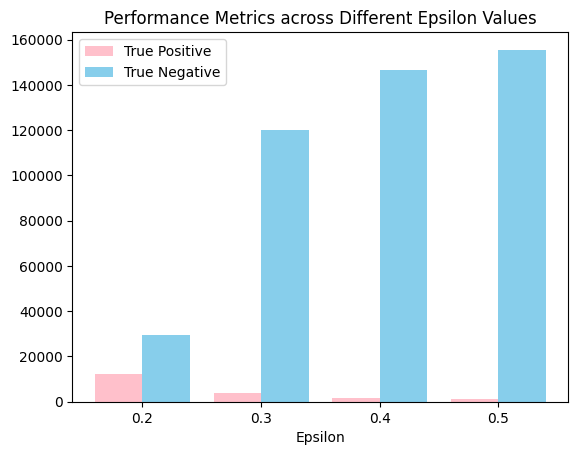

In [38]:
## Plot the performance of different epsilon values
barWidth = 0.4
br1 = np.arange(len(tps))
br2 = [x + barWidth for x in br1]
plt.bar(br1, tps, color="pink", width=barWidth, label="True Positive")
plt.bar(br2, tns, color="skyblue", width=barWidth, label="True Negative")

plt.title("Performance Metrics across Different Epsilon Values")
plt.xlabel("Epsilon")
plt.xticks([(2 * r + barWidth) / 2 for r in range(len(tps))], ['0.2', '0.3', '0.4', '0.5'])
plt.legend()
plt.show()

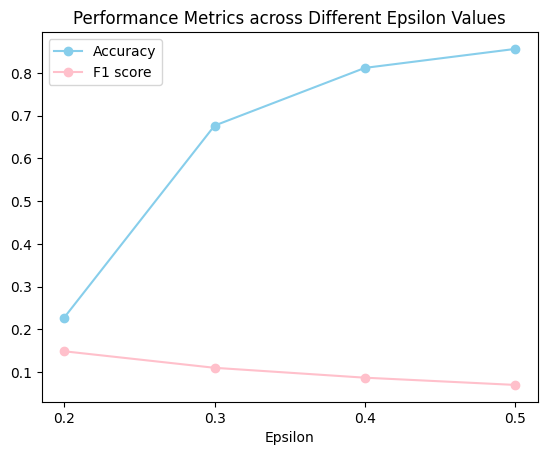

In [39]:
## Plot the accuracy and F1 score of different epsilon values
plt.plot([0.2, 0.3, 0.4, 0.5], accs, label="Accuracy", marker="o", c="skyblue")
plt.plot([0.2, 0.3, 0.4, 0.5], f1s, label="F1 score", marker="o", c="pink")

plt.title("Performance Metrics across Different Epsilon Values")
plt.xlabel("Epsilon")
plt.xticks([0.2, 0.3, 0.4, 0.5])
plt.legend()
plt.show()

In [34]:
## Perform DBSCAN with eps=0.45
min_samples = 2 * X_pca.shape[1]
eps = 0.45
dbscan=DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)

df_copy = df.copy()
df_copy["dbscan_labels"] = dbscan.labels_
print(df_copy["dbscan_labels"].value_counts())
print("# clusters generated:", len(df_copy["dbscan_labels"].value_counts()))

dbscan_labels
 0     166669
-1      14276
 2       1306
 1        185
 5         22
 20        21
 9         20
 6         19
 8         19
 26        17
 25        15
 32        15
 17        15
 33        14
 4         14
 23        12
 18        11
 19        10
 15        10
 30        10
 11        10
 28        10
 10         9
 35         9
 13         9
 3          9
 24         8
 14         8
 12         8
 21         8
 29         7
 34         7
 27         7
 7          6
 16         6
 31         6
 22         4
Name: count, dtype: int64
# clusters generated: 37


In [25]:
## Evaluate performance of DBSCAN
correct, tp, tn, fp, fn = performance_metrics(df_copy)

print("# correctly clustered rows:", correct)
print("# true positives:", tp)
print("# true negatives:", tn)
print("# false positives:", fp)
print("# false negatives:", fn)

# correctly clustered rows: 153706
# true positives: 1195
# true negatives: 152511
# false positives: 14158
# false negatives: 14947


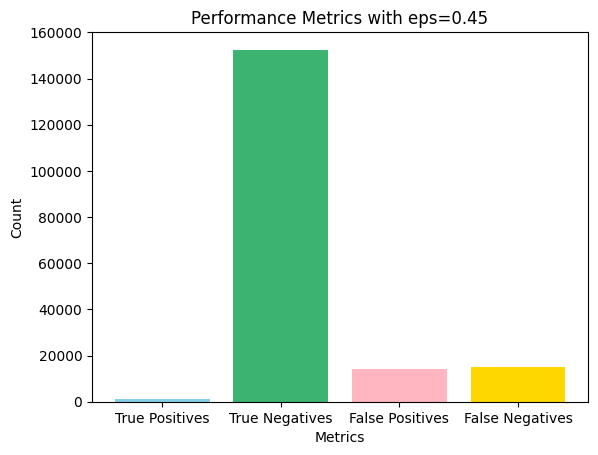

In [26]:
## Visualize the performance
labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
counts = [tp, tn, fp, fn]

plt.bar(labels, counts, color=["skyblue", "mediumseagreen", "lightpink", "gold"])
plt.title("Performance Metrics with eps=0.45")
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.show()

In [27]:
 ## Calculate F1 score
print("F1 Score:", f1_score(tp, fp, fn))
print("Accuracy:", correct / df.shape[0])

F1 Score: 0.07588506112081282
Accuracy: 0.8407918560699301


In [35]:
## Perform DBSCAN with eps=0.2
min_samples = 2 * X_pca.shape[1]
eps = 0.2
dbscan=DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)

df_copy = df.copy()
df_copy["dbscan_labels"] = dbscan.labels_
print(df_copy["dbscan_labels"].value_counts())
print("# clusters generated:", len(df_copy["dbscan_labels"].value_counts()))

dbscan_labels
-1      133369
 0       32330
 3        6516
 1        2287
 9        1777
         ...  
 148         4
 338         4
 93          4
 285         4
 142         2
Name: count, Length: 344, dtype: int64
# clusters generated: 344


In [36]:
## Evaluate performance of DBSCAN
correct, tp, tn, fp, fn = performance_metrics(df_copy)

print("# correctly clustered rows:", correct)
print("# true positives:", tp)
print("# true negatives:", tn)
print("# false positives:", fp)
print("# false negatives:", fn)

# correctly clustered rows: 41597
# true positives: 12310
# true negatives: 29287
# false positives: 3043
# false negatives: 138171


In [ ]:
## Visualize the performance
labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
counts = [tp, tn, fp, fn]

plt.bar(labels, counts, color=["skyblue", "mediumseagreen", "lightpink", "gold"])
plt.title("Performance Metrics with eps=0.2")
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.show()

In [ ]:
 ## Calculate F1 score
print("F1 Score:", f1_score(tp, fp, fn))
print("Accuracy:", correct / df.shape[0])

# K Means

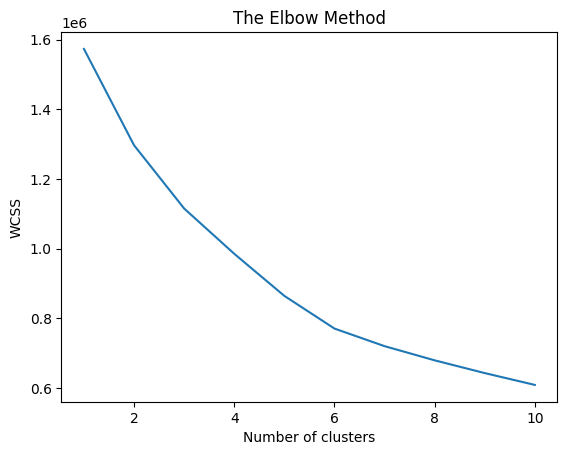

In [ ]:
# Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# perform k-means
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
kmeans.fit(X_pca)

cluster_labels = kmeans.predict(X_pca)

cluster_centers = kmeans.cluster_centers_
# Calculate the distance from each point to its assigned cluster center
distances = [np.linalg.norm(x - cluster_centers[cluster]) for x, cluster in zip(X_pca, cluster_labels)]

# assign threshold to identify anomalies
percentile_threshold = 95
threshold_distance = np.percentile(distances, percentile_threshold)
df_copy = df.copy()
df_copy["anomalies"] = np.zeros(len(df_copy), dtype=np.int64)
anomaly_indices = [i for i, distance in enumerate(distances) if distance > threshold_distance]
df_copy.loc[anomaly_indices, "anomalies"] = 1

In [ ]:
# Evaluate performance of K-means
correct = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(df_copy)):
    if df_copy["TARGET"][i] == 0 and df_copy["anomalies"][i] == 0:
        correct += 1
        tn += 1
    elif df_copy["TARGET"][i] == 1 and df_copy["anomalies"][i] == 1:
        correct += 1
        tp += 1
    elif df_copy["TARGET"][i] == 0 and df_copy["anomalies"][i] == 1:
        fp += 1
    elif df_copy["TARGET"][i] == 1 and df_copy["anomalies"][i] == 0:
        fn += 1

print("# correctly clustered rows:", correct)
print("# true positives:", tp)
print("# true negatives:", tn)
print("# false positives:", fp)
print("# false negatives:", fn)

# correctly clustered rows: 159557
# true positives: 620
# true negatives: 158937
# false positives: 8521
# false negatives: 14733


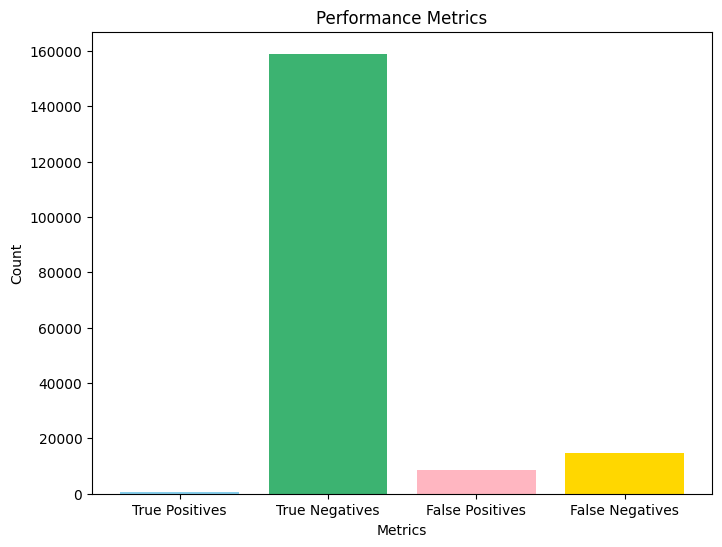

In [ ]:
## Visualize the performance
labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
counts = [tp, tn, fp, fn]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=["skyblue", "mediumseagreen", "lightpink", "gold"])
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.title("Performance Metrics")
plt.show()

In [ ]:
## Calculate F1 score
def f1_score(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

print("F1 Score:", f1_score(tp, fp, fn))

F1 Score: 0.05062464276965788


# CBLOF

In [ ]:
# Perform CBLOF
!pip install pyod
from pyod.models.cblof import CBLOF

cblof_model = CBLOF(contamination=0.05, n_clusters = 6,random_state=0)
cblof_model.fit(X_pca)
scores_pred = cblof_model.decision_function(X_pca) * -1
threshold = np.percentile(scores_pred, 95)
outliers = X_pca[scores_pred > threshold]

df_copy = df.copy()
df_copy["anomalies"] = np.zeros(len(df_copy), dtype=np.int64)
df_copy.loc[scores_pred > threshold, "anomalies"] = 1

In [ ]:
# Evaluate performance of CBLOF
correct = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(df_copy)):
    if df_copy["TARGET"][i] == 0 and df_copy["anomalies"][i] == 0:
        correct += 1
        tn += 1
    elif df_copy["TARGET"][i] == 1 and df_copy["anomalies"][i] == 1:
        correct += 1
        tp += 1
    elif df_copy["TARGET"][i] == 0 and df_copy["anomalies"][i] == 1:
        fp += 1
    elif df_copy["TARGET"][i] == 1 and df_copy["anomalies"][i] == 0:
        fn += 1

print("# correctly clustered rows:", correct)
print("# true positives:", tp)
print("# true negatives:", tn)
print("# false positives:", fp)
print("# false negatives:", fn)

# correctly clustered rows: 160001
# true positives: 842
# true negatives: 159159
# false positives: 8299
# false negatives: 14511


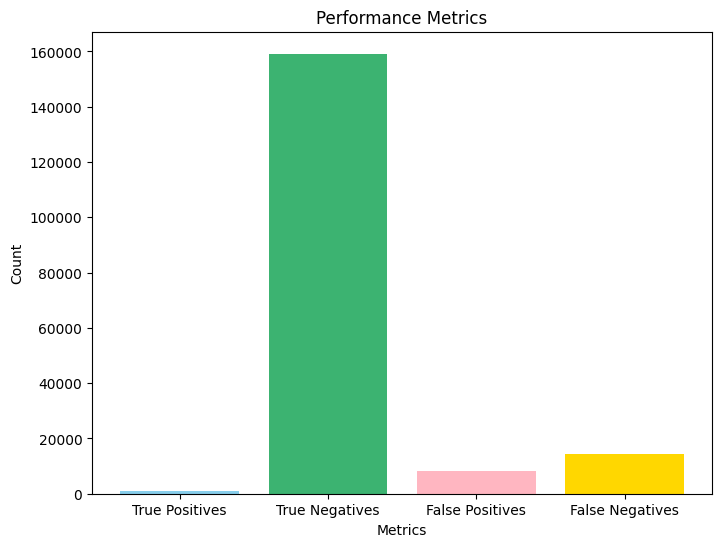

In [ ]:
# Visualize the performance
labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
counts = [tp, tn, fp, fn]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=["skyblue", "mediumseagreen", "lightpink", "gold"])
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.title("Performance Metrics")
plt.show()

In [ ]:
## Calculate F1 score
def f1_score(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

print("F1 Score:", f1_score(tp, fp, fn))
print("Accuracy:", correct / df.shape[0])

F1 Score: 0.06875153098718054
Accuracy: 0.8752263266433639
